In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import seaborn as sns

# Supporting Functions

In [2]:
def print_features(G_list):
    
    diameter = 0
    clustering = 0
    num_connected_com = 0
    
    for G in G_list:
        
        if nx.is_connected(G) ==  True:
            diameter = diameter + nx.diameter(G)
        else:
            Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
            G0 = G.subgraph(Gcc[0])
            diameter = diameter + nx.diameter(G0)
            
        clustering = clustering + nx.average_clustering(G)
        
        num_connected_com = num_connected_com + nx.number_connected_components(G)
        

    print("Average Diameter is ", diameter / len(G_list))
    print("Average Clustering coefficient is ", clustering / len(G_list))
    print("Average Number of connected components is", num_connected_com / len(G_list))

In [3]:
def draw_histogram(G_list):
    
    length_sequence = []
    degree_sequence = []
    clustering_sequence = []
    betweeness_sequence = []
    
    for G in G_list:
        df_matrix = pd.DataFrame.from_dict(dict(nx.shortest_path_length(G)))
        df_edge = df_matrix.rename_axis('Source')\
              .reset_index()\
              .melt('Source', value_name='Length', var_name='Target')\
              .query('Source != Target')\
              .reset_index(drop=True)

        length_sequence = sorted(list(df_edge['Length'])) + length_sequence

        degree_sequence = sorted((d for n, d in G.degree()), reverse=True) + degree_sequence
#         print(degree_sequence)
        max_degree = max(degree_sequence)

        dict_clustering = dict(nx.clustering(G))
        clustering_sequence = list(dict_clustering.values()) + list(clustering_sequence)
#         print(clustering_sequence)
        
        dict_betweenness = dict(nx.betweenness_centrality(G))
        betweeness_sequence = list(dict_betweenness.values()) + betweeness_sequence
        max_betweeness = max(betweeness_sequence)

    
    clustering_sequence = [ '%.2f' % elem for elem in clustering_sequence ]
    betweeness_sequence = [ '%.2f' % elem for elem in betweeness_sequence ]
    
    # draw histogram
    fig = plt.figure( figsize=(9, 12))
    axgrid = fig.add_gridspec(8, 4)

    ax0 = fig.add_subplot(axgrid[:2, :])
    ax0.bar(*np.unique(length_sequence, return_counts=True))
    ax0.set_xticks(np.arange(0, max(length_sequence)+1, 1))
    ax0.set_title("Shortest Path Length histogram")
    ax0.set_xlabel("Length")
    ax0.set_ylabel("# of Paths")

    ax1 = fig.add_subplot(axgrid[2:4, :])
    ax1.bar(*np.unique(clustering_sequence, return_counts=True))
    max_node1 = max(*np.unique(clustering_sequence, return_counts=True)[1])
    ax1.set_title("Clustering histogram")
    ax1.set_xlabel("Clustering")
    ax1.set_ylabel("# of Nodes")

    ax2 = fig.add_subplot(axgrid[4:6, :])
    ax2.bar(*np.unique(degree_sequence, return_counts=True))
    ax2.set_xticks(np.arange(1, max_degree+1, 1))
    ax2.set_title("Degree histogram")
    ax2.set_xlabel("Degree")
    max_node2 = max(*np.unique(degree_sequence, return_counts=True)[1])
    ax2.set_ylabel("# of Nodes")
    
    ax3 = fig.add_subplot(axgrid[6:, :])
    ax3.bar(*np.unique(betweeness_sequence, return_counts=True))
    ax3.set_title("Betweenness Centrality histogram")
    ax3.set_xlabel("Betweenness Centrality")
    max_node3 = max(*np.unique(betweeness_sequence, return_counts=True)[1])
#     print(np.arange(0, max_betweeness + 0.02, 0.02, dtype = float))
#     ax3.set_xticks(np.arange(0, max_betweeness + 0.02, 0.02, dtype = float))
    ax3.set_ylabel("# of Nodes")

    fig.tight_layout()
    plt.show()

# 1 Real Networks

## 1.1 Karate Club Dataset

In [4]:
### network generatoin
f_karate = open("karate/zachary.dat", "r")
df_karate = f_karate.readlines()
df_zachestr = np.array(df_karate[7:41])

df_zache = np.empty((0, len(df_zachestr)), int)

for i in df_zachestr:
    df_zache = np.append(df_zache, [np.fromstring(i, dtype=int, sep=' ')],  axis=0)

G_karate = nx.from_numpy_matrix(df_zache)

Average Diameter is  5.0
Average Clustering coefficient is  0.5706384782076823
Average Number of connected components is 1.0


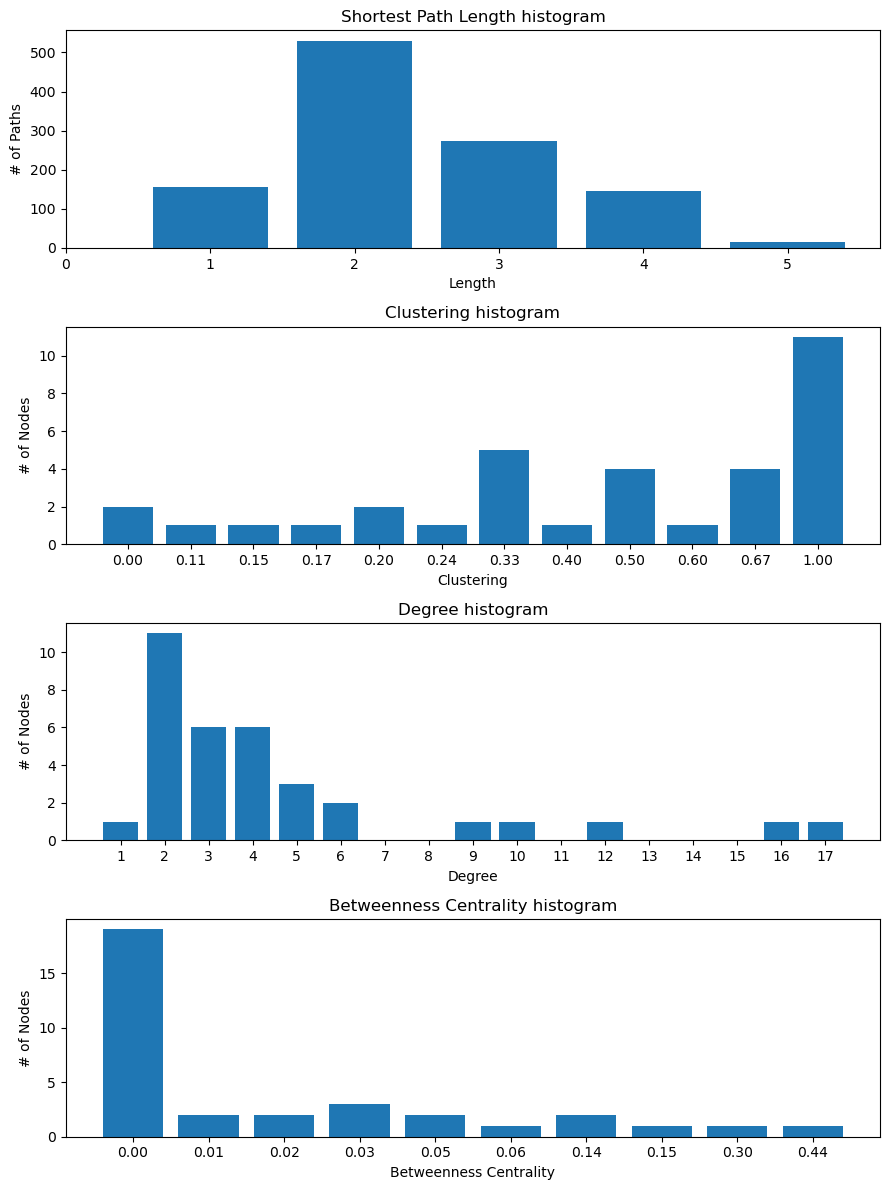

In [5]:
print_features([G_karate])
draw_histogram([G_karate])

## 1.2 Prison Dataset

In [6]:
# data load and preprocess
f_prison = open("prison/prison.dat", "r")
fin_prison = f_prison.readlines()
df_prisonstr = np.array(fin_prison[4:71])
# print(df_prisonstr)

df_prison = np.empty((0, len(df_prisonstr)), int)
for i in df_prisonstr:
    df_prison = np.append(df_prison, [np.fromstring(i, dtype=int, sep=' ')],  axis=0)
df_prison = pd.DataFrame(df_prison)
G_prison = nx.from_pandas_adjacency(df_prison,create_using=nx.DiGraph())
G_prison = nx.to_undirected(G_prison)

Average Diameter is  7.0
Average Clustering coefficient is  0.3099082509530271
Average Number of connected components is 1.0


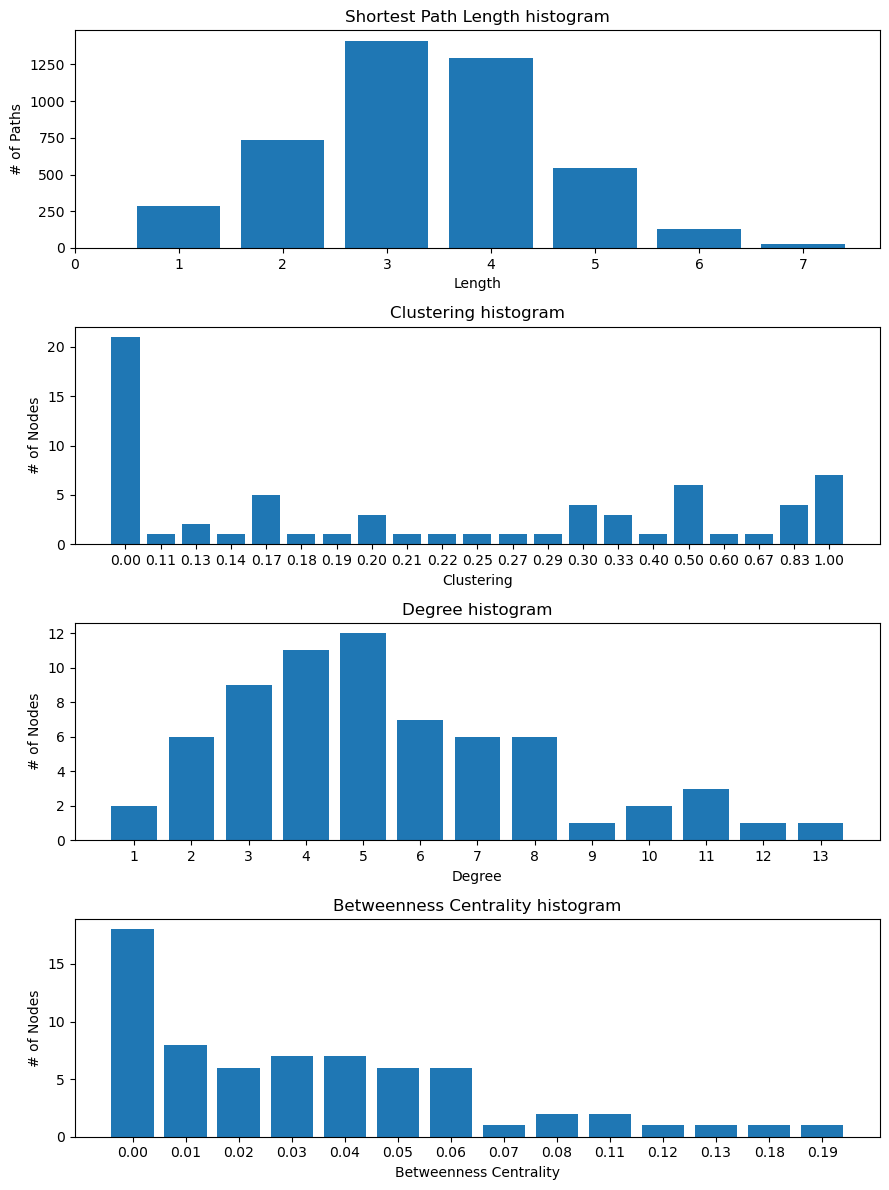

In [7]:
print_features([G_prison])
draw_histogram([G_prison])

## 1.3 Dolphins Dataset

In [8]:
# data load and preprocess
f_dophin = open("dolphins/dolphins.dat", "r")
fin_dophin = f_dophin.readlines()
df_dophinstr = np.array(fin_dophin[130:192])

df_dophoin = np.empty((0, len(df_dophinstr)), int)
for i in df_dophinstr:
    df_dophoin = np.append(df_dophoin, [np.fromstring(i, dtype=int, sep=' ')],  axis=0)

G_dolphin = nx.from_numpy_matrix(df_dophoin)

Average Diameter is  8.0
Average Clustering coefficient is  0.2589582460550202
Average Number of connected components is 1.0


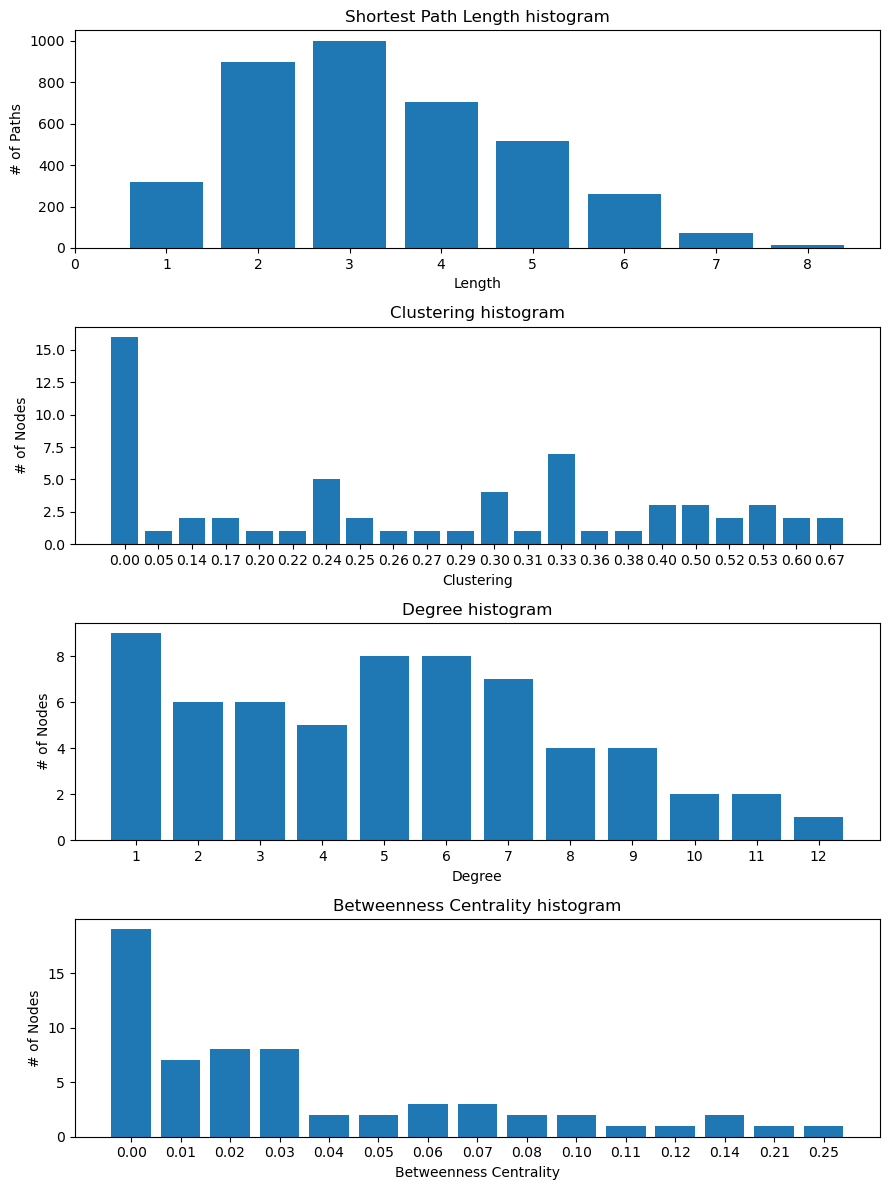

In [9]:
print_features([G_dolphin])
draw_histogram([G_dolphin])

# 2 Random Graph on Karate Club

## 2.1 Erdos-Renyi model/Karate Club

In [10]:
nodes_num = nx.number_of_nodes(G_karate)
probability = nx.number_of_edges(G_karate) / (nodes_num * (nodes_num - 1) / 2)
print("n =", nodes_num)
print("p =", probability)

n = 34
p = 0.13903743315508021


Average Diameter is  4.6
Average Clustering coefficient is  0.12326500297088536
Average Number of connected components is 1.0


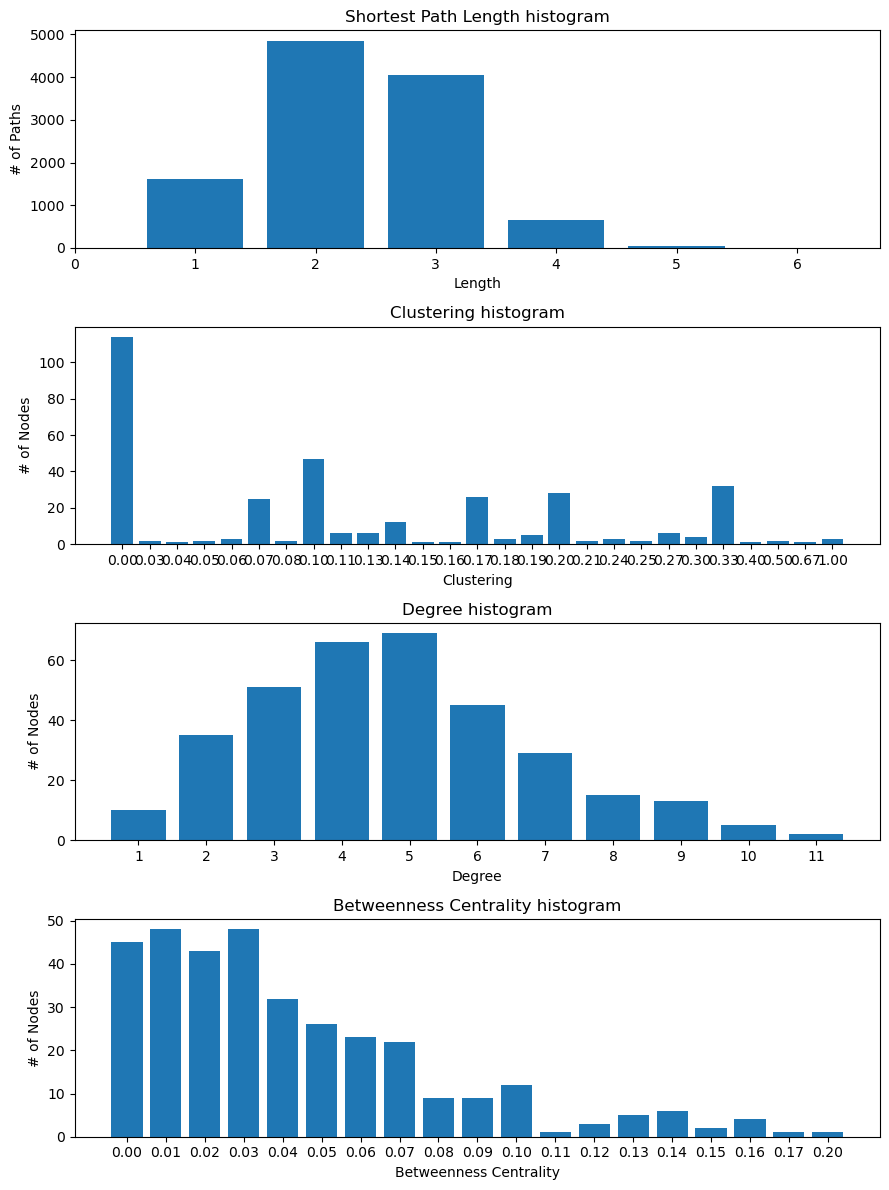

In [11]:
G_list = []
for i in np.arange(0, 10):
    G_list.append(nx.gnp_random_graph(nx.number_of_nodes(G_karate), probability))

print_features(G_list)
draw_histogram(G_list)

## 2.2 Watts and Strogatz model/Karate Club

In [12]:
nodes_num = nx.number_of_nodes(G_karate)
print("n =", nodes_num)
print("p =", 0.65)
print("c =", 4)

n = 34
p = 0.65
c = 4


Average Diameter is  4.8
Average Clustering coefficient is  0.13153361344537814
Average Number of connected components is 1.0


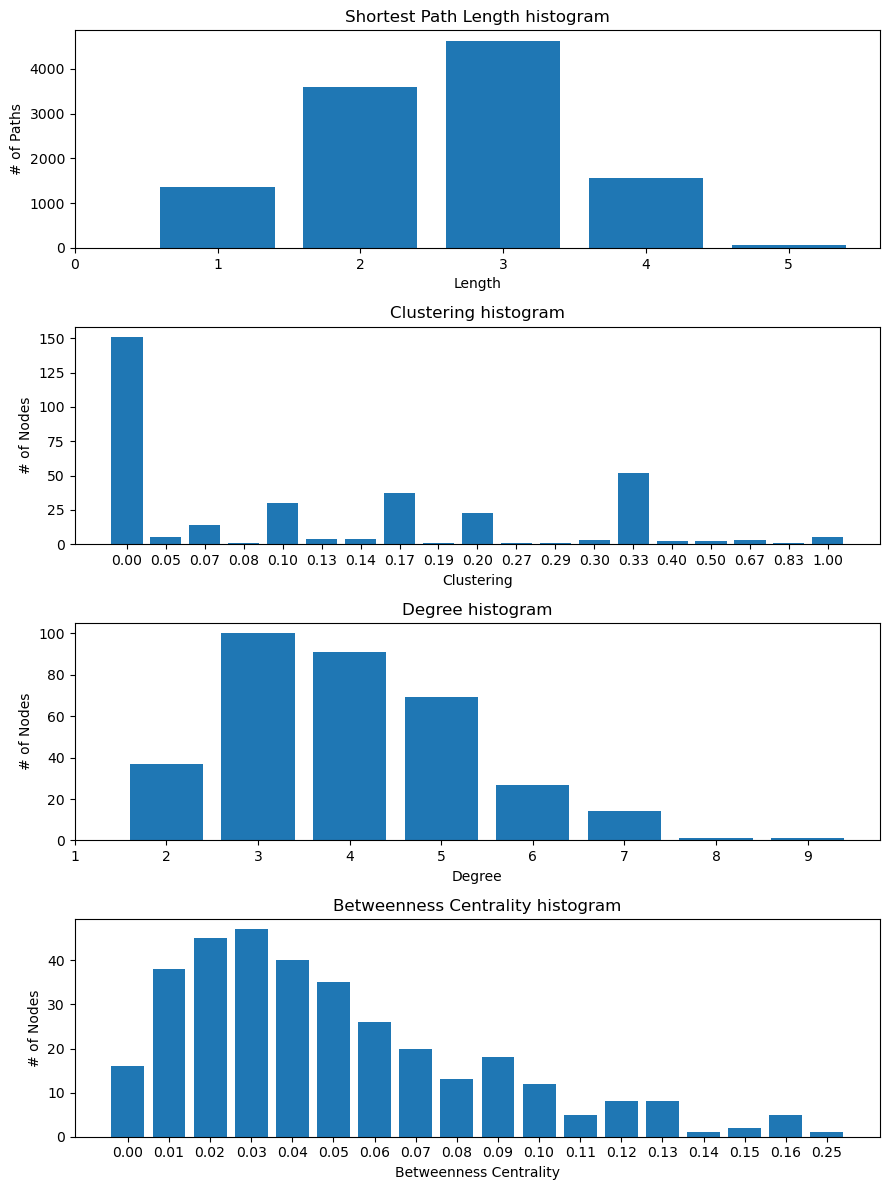

In [13]:
G_list = []
for i in np.arange(0, 10):
    G_list.append(nx.watts_strogatz_graph(nodes_num, 4, 0.65))

print_features(G_list)
draw_histogram(G_list)

## 2.3 Configuration model/Karate Club

In [14]:
degree_sequence = sorted((d for n, d in G_karate.degree()), reverse=True)
print(degree_sequence)

[17, 16, 12, 10, 9, 6, 6, 5, 5, 5, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1]


Average Diameter is  5.1
Average Clustering coefficient is  0.17444601150483502
Average Number of connected components is 1.0


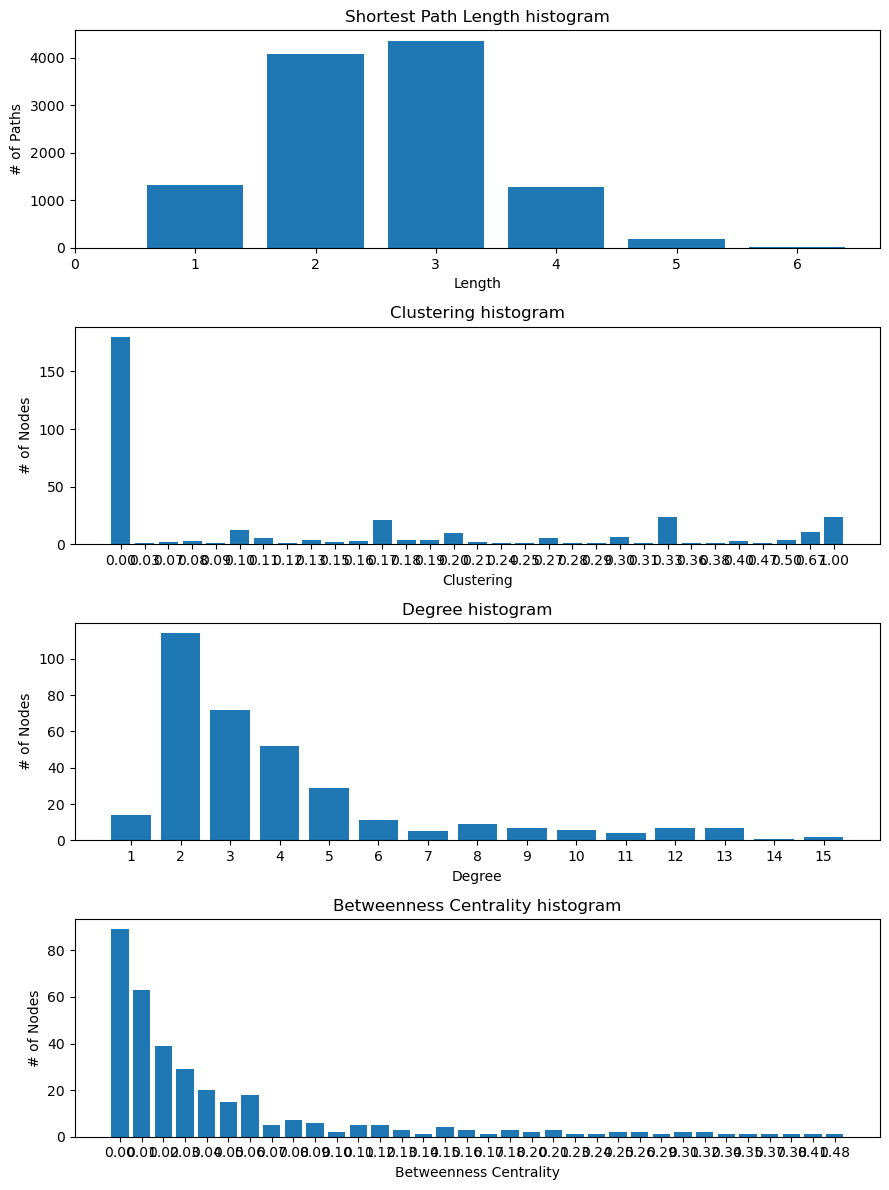

In [15]:
G_list = []
for i in np.arange(0, 10):
    G_list.append(nx.Graph(nx.configuration_model(degree_sequence)))

print_features(G_list)
draw_histogram(G_list)

## 2.4 Barabasi-Albert preferential attachment model/Karate Club

In [16]:
nodes_num = nx.number_of_nodes(G_karate)
print("n =", nodes_num)
print("m =", 3)

n = 34
m = 3


Average Diameter is  3.9
Average Clustering coefficient is  0.28815354597748516
Average Number of connected components is 1.0


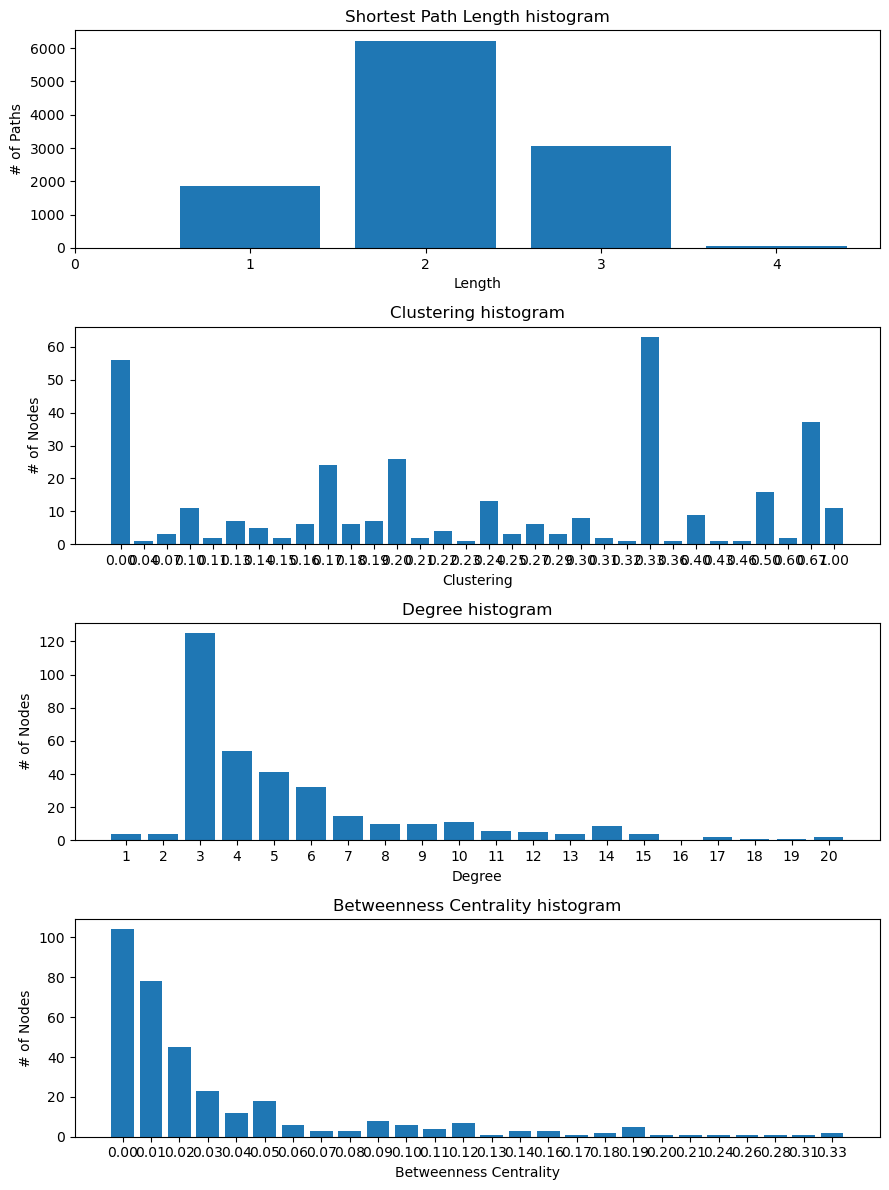

In [17]:
G_list = []
for i in np.arange(0, 10):
    G_list.append(nx.barabasi_albert_graph(nodes_num, 3))

print_features(G_list)
draw_histogram(G_list)

# 3 Random Graph on Prison

## 3.1 Erdos-Renyi model/Prison

In [18]:
nodes_num = nx.number_of_nodes(G_prison)
probability = nx.number_of_edges(G_prison) / (nodes_num * (nodes_num - 1) / 2)
print("n =", nodes_num)
print("p =", probability)

n = 67
p = 0.08231569425599276


Average Diameter is  5.2
Average Clustering coefficient is  0.08715610260386378
Average Number of connected components is 1.0


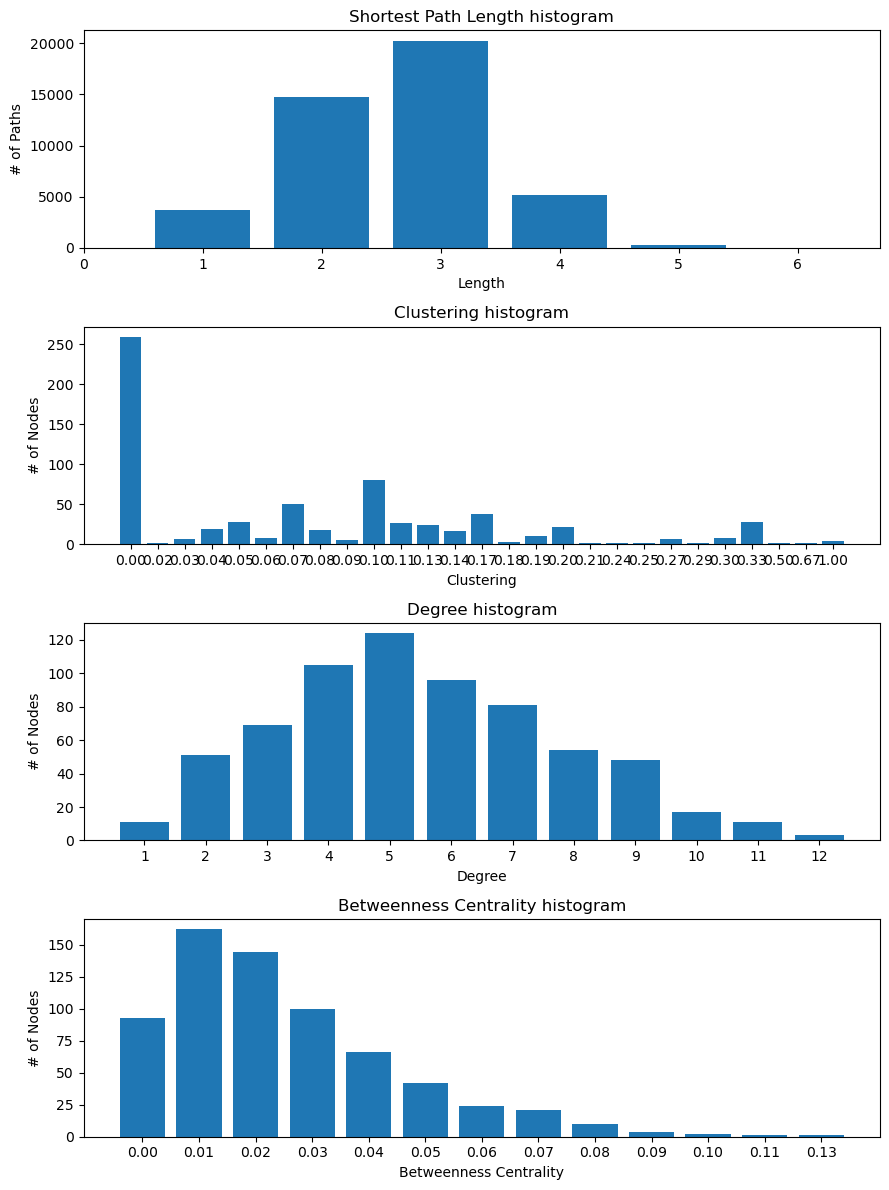

In [19]:
G_list = []
for i in np.arange(0, 10):
    G = nx.gnp_random_graph(nx.number_of_nodes(G_prison), probability)
    G_list.append(G)

print_features(G_list)
draw_histogram(G_list)

## 3.2 Watts and Strogatz model/Prison

In [20]:
nodes_num = nx.number_of_nodes(G_prison)
print("n =", nodes_num)
print("p =", 0.25)
print("c =", 20)

n = 67
p = 0.25
c = 20


Average Diameter is  5.8
Average Clustering coefficient is  0.06834399431414358
Average Number of connected components is 1.0


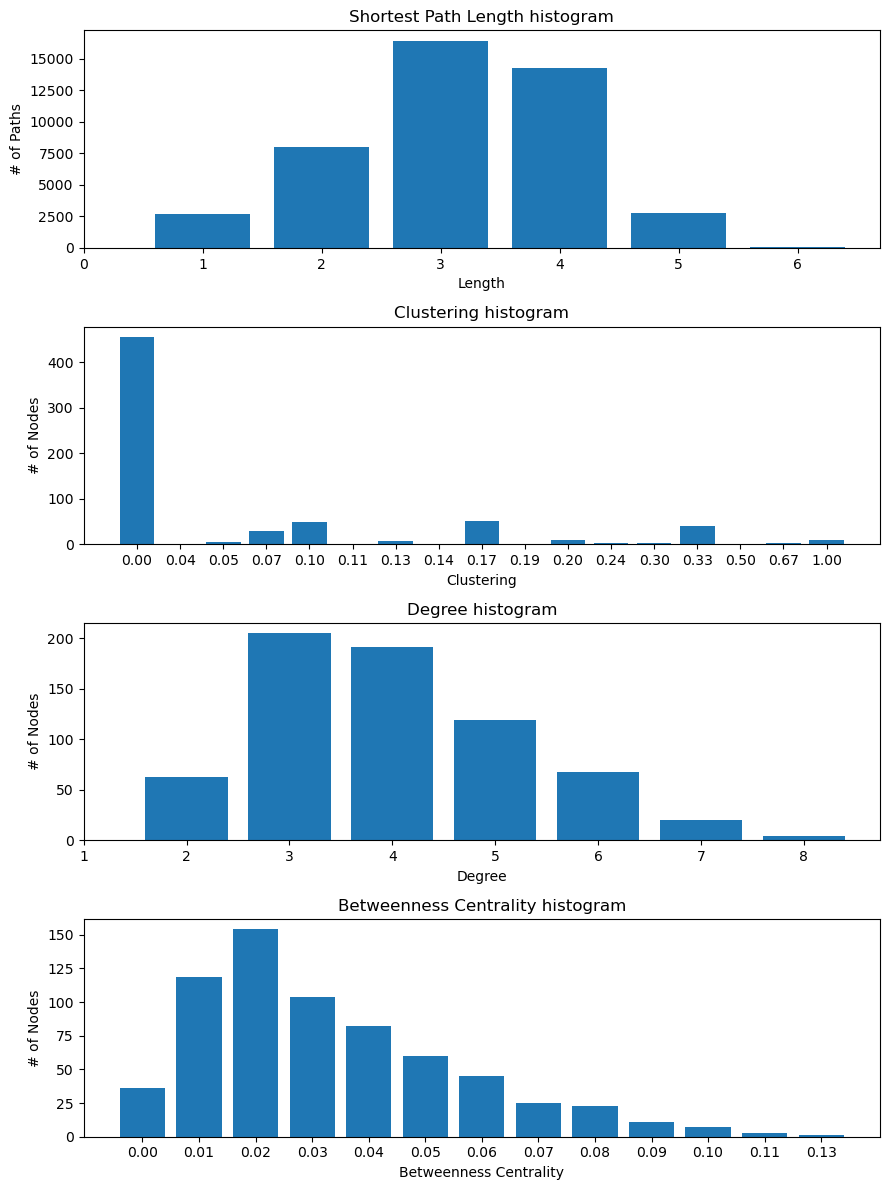

In [21]:
G_list = []
for i in np.arange(0, 10):
    G = nx.watts_strogatz_graph(nodes_num, 4, 0.65)
    G_list.append(G)

print_features(G_list)
draw_histogram(G_list)

## 3.3 Configuration model/Prison

In [22]:
degree_sequence = sorted((d for n, d in G_prison.degree()), reverse=True)
print("degree sequence is", degree_sequence)

degree sequence is [13, 12, 11, 11, 11, 10, 10, 9, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1]


Average Diameter is  5.5
Average Clustering coefficient is  0.0738600205764385
Average Number of connected components is 1.0


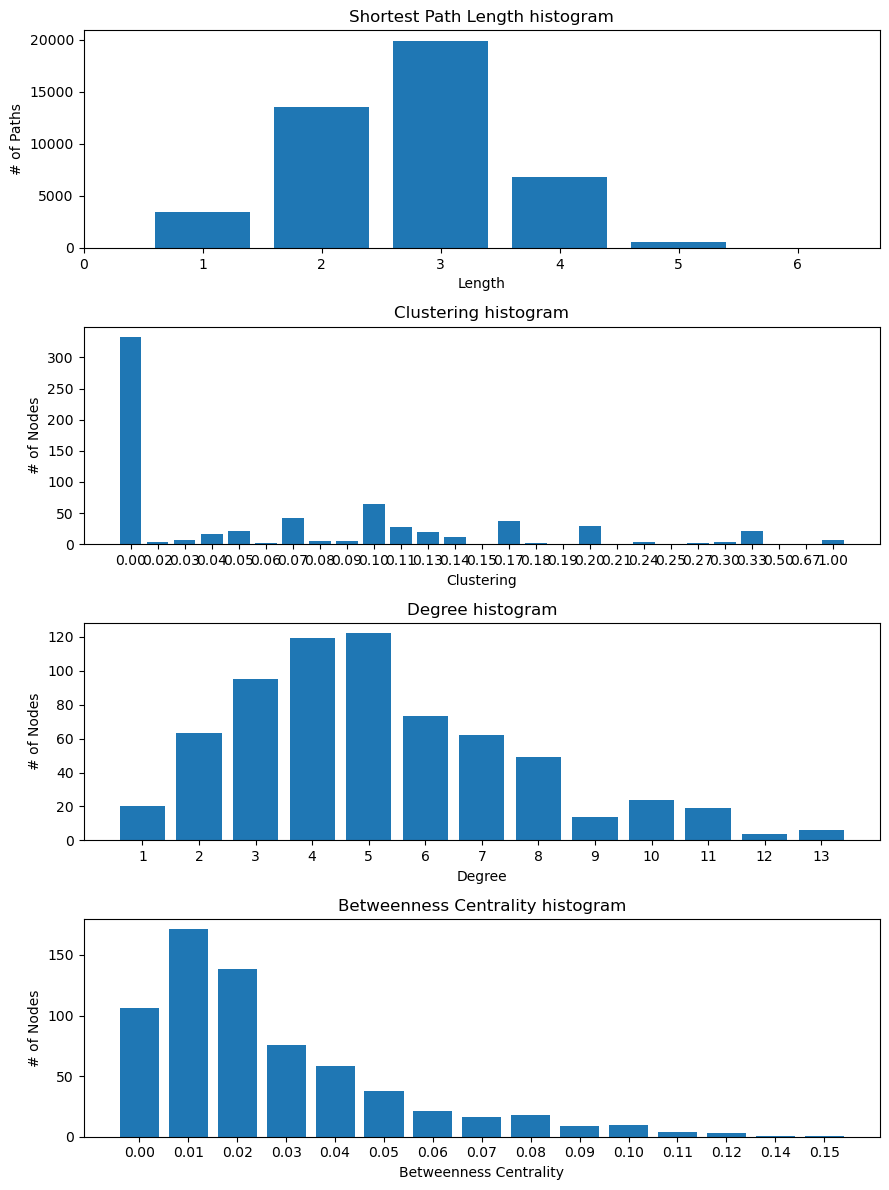

In [23]:
G_list = []
for i in np.arange(0, 10):
    G = nx.configuration_model(degree_sequence)
    G=nx.Graph(G)
    G_list.append(G)

print_features(G_list)
draw_histogram(G_list)

## 3.4 Barabasi-Albert preferential attachment model/Prison

In [24]:
nodes_num = nx.number_of_nodes(G_prison)
print("n =", nodes_num)
print("m =", 5)

n = 67
m = 5


Average Diameter is  3.3
Average Clustering coefficient is  0.24784004206727622
Average Number of connected components is 1.0


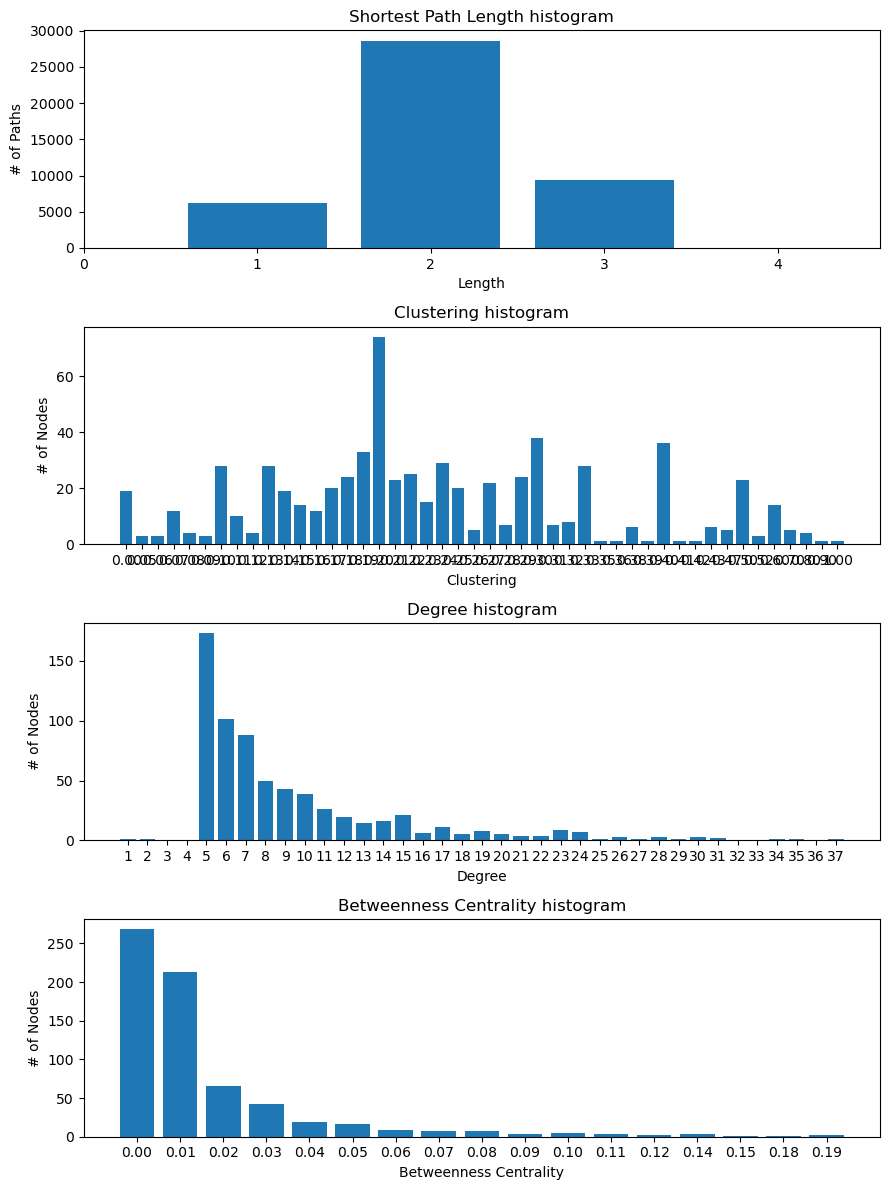

In [25]:
G_list = []
for i in np.arange(0, 10):
    G = nx.barabasi_albert_graph(nodes_num, 5)
    G_list.append(G)

print_features(G_list)
draw_histogram(G_list)

# 4 Random Graph on Dolphins

## 4.1 Erdos-Renyi model/Dolphins

In [26]:
nodes_num = nx.number_of_nodes(G_dolphin)
probability = nx.number_of_edges(G_dolphin) / (nodes_num * (nodes_num - 1) / 2)
print("n =", nodes_num)
print("p =", probability)

n = 62
p = 0.08408249603384453


Average Diameter is  5.0
Average Clustering coefficient is  0.07748185479528763
Average Number of connected components is 1.0


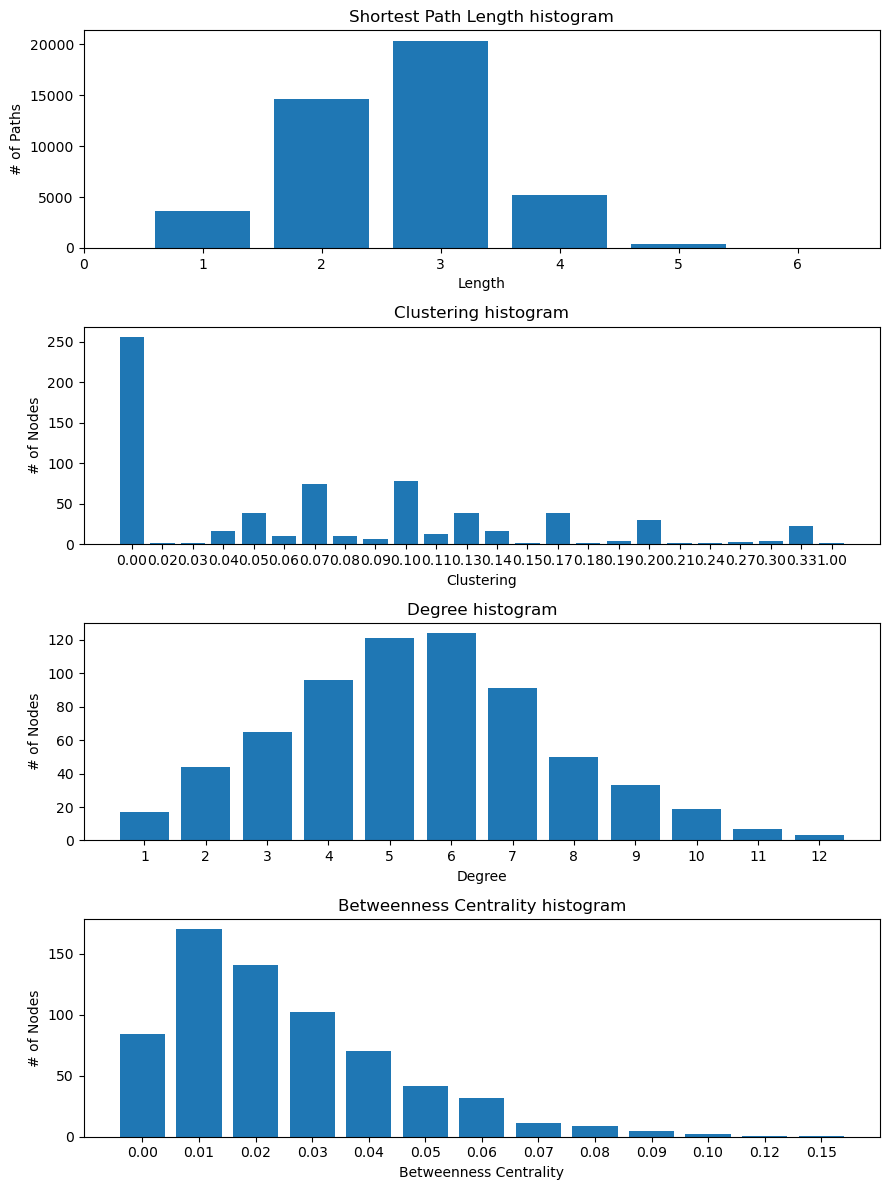

In [27]:
G_list = []
for i in np.arange(0, 10):
    G = nx.gnp_random_graph(nx.number_of_nodes(G_prison), probability)
    G_list.append(G)

print_features(G_list)
draw_histogram(G_list)

## 4.2 Watts and Strogatz model/Dolphins

In [28]:
nodes_num = nx.number_of_nodes(G_dolphin)
print("n =", nodes_num)
print("p =", 0.25)
print("c =", 12)

n = 62
p = 0.25
c = 12


Average Diameter is  5.7
Average Clustering coefficient is  0.06694316436251921
Average Number of connected components is 1.0


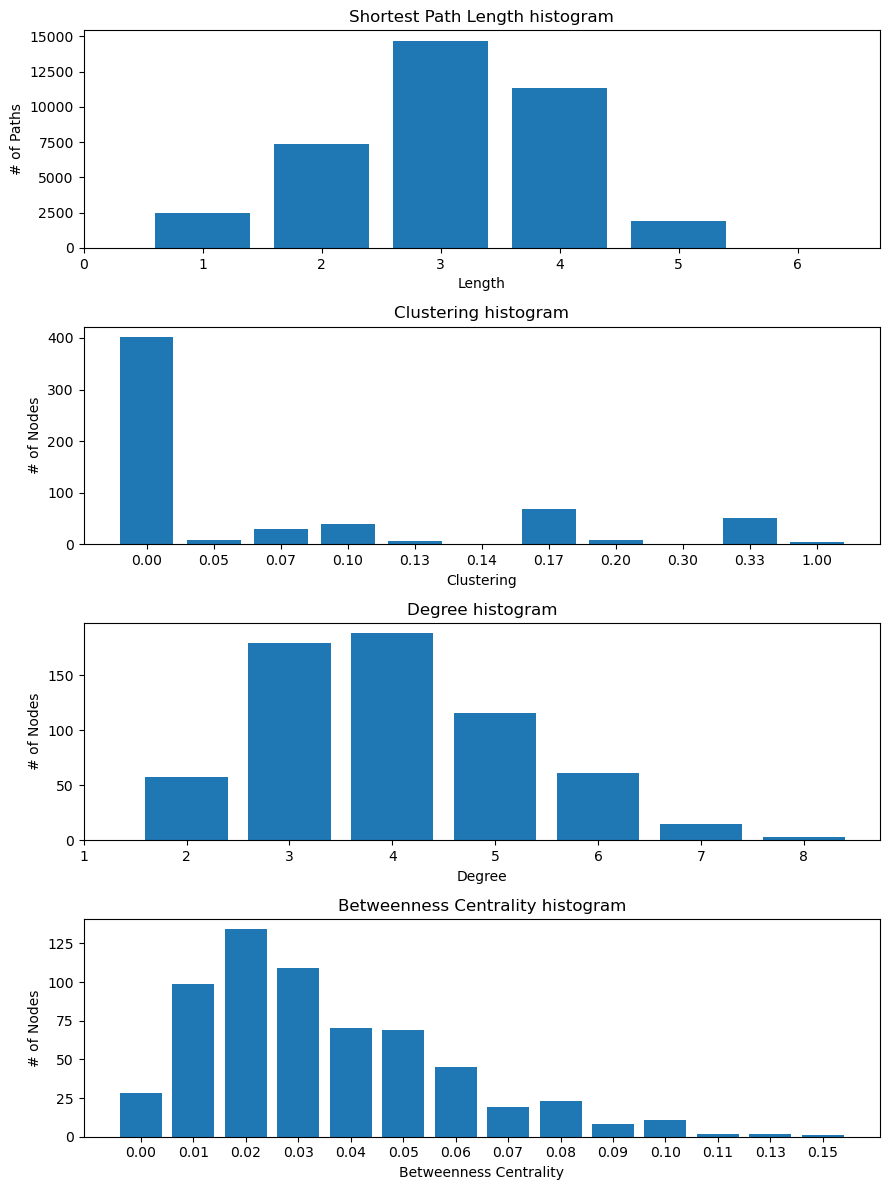

In [29]:
G_list = []
for i in np.arange(0, 10):
    G = nx.watts_strogatz_graph(nodes_num, 4, 0.65)
    G_list.append(G)

print_features(G_list)
draw_histogram(G_list)

## 4.3 Configuration model/Dolphin

In [30]:
degree_sequence = sorted((d for n, d in G_dolphin.degree()), reverse=True)
print("degree sequence is", degree_sequence)

degree sequence is [12, 11, 11, 10, 10, 9, 9, 9, 9, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Average Diameter is  5.8
Average Clustering coefficient is  0.08403668016571242
Average Number of connected components is 1.1


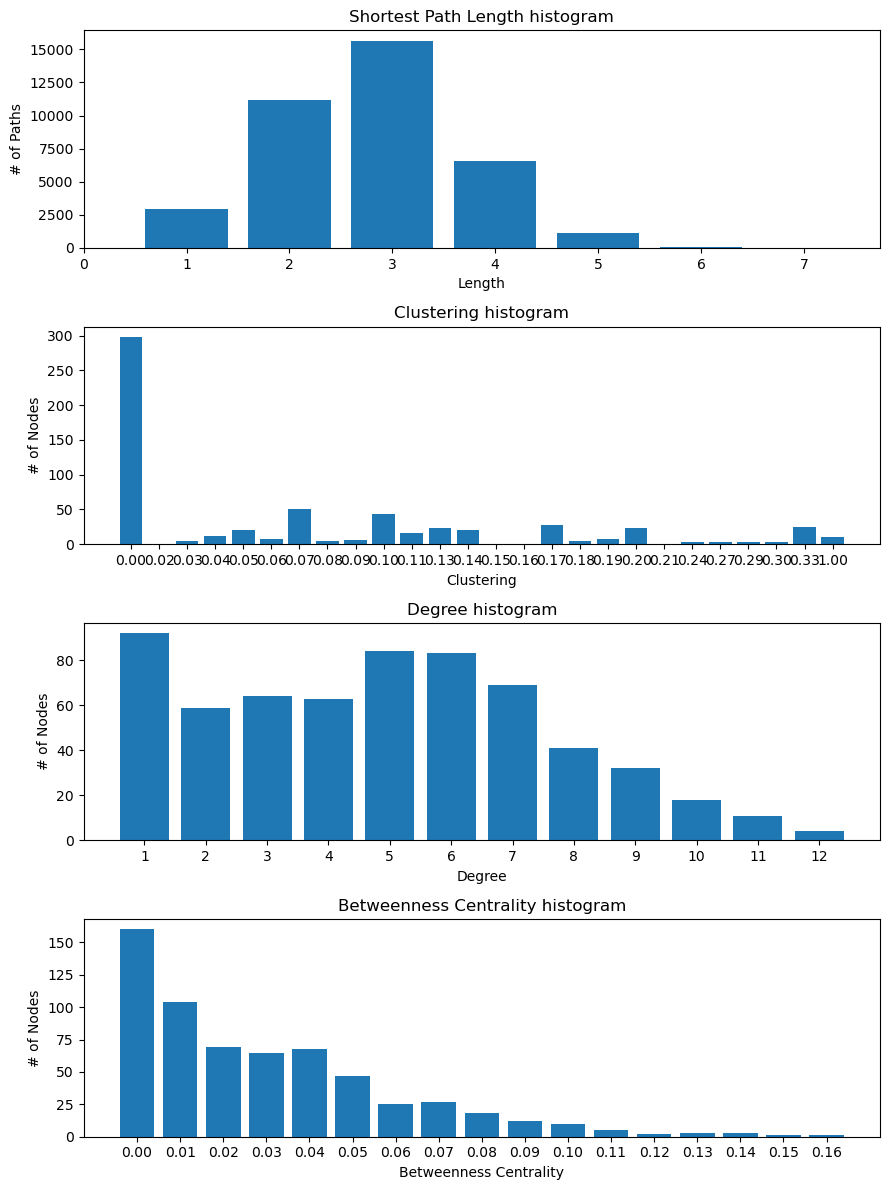

In [31]:
G_list = []
for i in np.arange(0, 10):
    G = nx.configuration_model(degree_sequence)
    G=nx.Graph(G)
    G_list.append(G)

print_features(G_list)
draw_histogram(G_list)

## 4.4 Barabasi-Albert preferential attachment model/Dolphins

In [32]:
nodes_num = nx.number_of_nodes(G_dolphin)
print("n =", nodes_num)
print("m =", 4)

n = 62
m = 4


Average Diameter is  4.0
Average Clustering coefficient is  0.2289561279016795
Average Number of connected components is 1.0


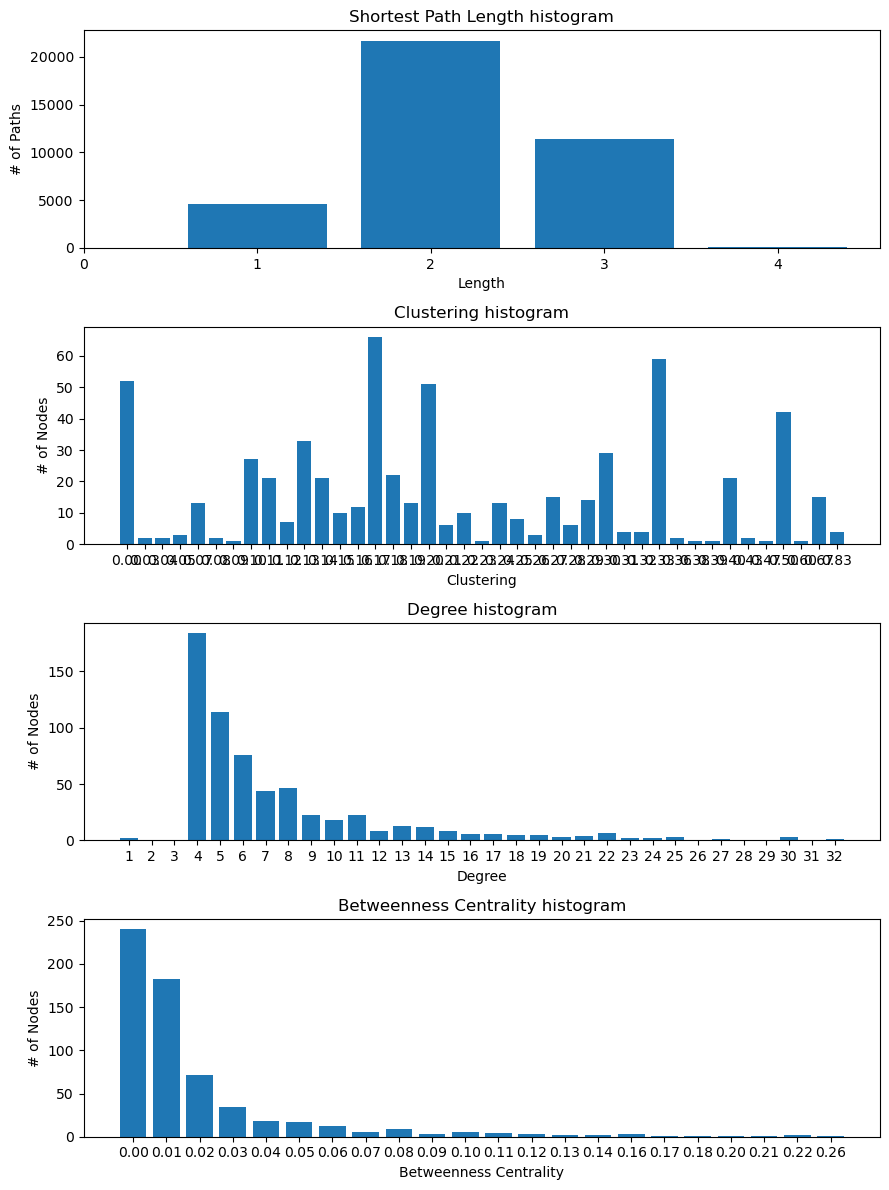

In [33]:
G_list = []
for i in np.arange(0, 10):
    G = nx.barabasi_albert_graph(nodes_num, 4)
    G_list.append(G)

print_features(G_list)
draw_histogram(G_list)